In [1]:
from importlib import reload
import data_cleaning_rules
reload(data_cleaning_rules)

from data_cleaning_rules import InsuranceDataCleaner
cleaner = InsuranceDataCleaner("./data/raw_data.xlsx")
df = cleaner.clean()

In [15]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve

# Dummy encoding and Scaling (Standard Scaler)

In [4]:
X = df.drop(columns='Insurance_premium')
y = df['Insurance_premium']


categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Dummy encoding
X_dummies = pd.get_dummies(X[categorical_cols], drop_first=True).astype(int)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols, index=X.index)


X_final_dummies = pd.concat([X_scaled_df, X_dummies], axis=1)


In [5]:
X_final_dummies.shape, X_final_dummies.head()

((10902, 125),
         Age  Driving_experience  Bonus_Malus  Insurance_months  Model_2106  \
 0 -1.356114           -0.913322     0.370963          0.525804           0   
 1 -0.887191           -0.109826     0.370963          0.525804           0   
 2 -0.105653            1.152811     0.370963          0.525804           0   
 3 -0.183807           -0.568967    -0.215244         -1.852091           0   
 4  0.050654            0.004959     0.957170          0.525804           0   
 
    Model_21063  Model_21074  Model_21099  Model_21213  Model_323  ...  \
 0            0            0            0            0          0  ...   
 1            0            0            0            0          0  ...   
 2            0            0            0            0          0  ...   
 3            0            0            0            0          0  ...   
 4            0            0            0            0          0  ...   
 
    Region_Восточно-Казахстанская область  Region_Жамбылская об

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final_dummies, y, test_size=0.2, random_state=42
)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8721, 125), (2181, 125), (8721,), (2181,))

# Linear Regression

In [7]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


{
    "Model": "Linear Regression",
    "RMSE": rmse_lr,
    "MAE": mae_lr,
    "R^2 Score": r2_lr
}


{'Model': 'Linear Regression',
 'RMSE': np.float64(2738.4741420591417),
 'MAE': 1880.4606381883643,
 'R^2 Score': 0.7591699381241575}

# Decision Tree Regressor

In [8]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

{
    "Model": "Decision Tree Regressor",
    "RMSE": rmse_dt,
    "MAE": mae_dt,
    "R^2 Score": r2_dt
}


{'Model': 'Decision Tree Regressor',
 'RMSE': np.float64(3440.5450488684514),
 'MAE': 2066.9895690050434,
 'R^2 Score': 0.6198562053109629}

# Random Forest Regressor

In [9]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

{
    "Model": "Random Forest Regressor",
    "RMSE": rmse_rf,
    "MAE": mae_rf,
    "R^2 Score": r2_rf
}


{'Model': 'Random Forest Regressor',
 'RMSE': np.float64(2568.9340149229292),
 'MAE': 1618.284487343799,
 'R^2 Score': 0.7880666481823653}

# SVR

In [10]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

{
    "Model": "Support Vector Regressor",
    "RMSE": rmse_svr,
    "MAE": mae_svr,
    "R^2 Score": r2_svr
}

{'Model': 'Support Vector Regressor',
 'RMSE': np.float64(5567.195543619335),
 'MAE': 4535.321436617333,
 'R^2 Score': 0.0046716827386955595}

# K Neighbors Regressor

In [11]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

{
    "Model": "K-Nearest Neighbors Regressor",
    "RMSE": rmse_knn,
    "MAE": mae_knn,
    "R^2 Score": r2_knn
}


{'Model': 'K-Nearest Neighbors Regressor',
 'RMSE': np.float64(3169.910170922734),
 'MAE': 2248.8123796423656,
 'R^2 Score': 0.6773086536995132}

# Comparing Models

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Support Vector Regressor": SVR(kernel='rbf')
}


results = []


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "RMSE": round(rmse, 2),
        "MAE": round(mae, 2),
        "R2 Score": round(r2, 3)
    })


results_df = pd.DataFrame(results)
results_df.sort_values(by='R2 Score', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)


results_df

,Model,RMSE,MAE,R2 Score
0,Random Forest Regressor,2568.93,1618.28,0.788
1,Linear Regression,2738.47,1880.46,0.759
2,K-Nearest Neighbors,3169.91,2248.81,0.677
3,Decision Tree Regressor,3440.55,2066.99,0.620
4,Support Vector Regressor,5567.20,4535.32,0.005


### Random Forest Regressor has the best performance among models trained.

# K-Fold Cross-Validation

In [16]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mse_scores = cross_val_score(rf_model, X_final_dummies, y, cv=kf, scoring='neg_mean_squared_error')
neg_mae_scores = cross_val_score(rf_model, X_final_dummies, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(rf_model, X_final_dummies, y, cv=kf, scoring='r2')

rmse_scores = np.sqrt(-neg_mse_scores)
mae_scores = -neg_mae_scores

{
    "Model": "Random Forest Regressor (CV)",
    "CV RMSE (mean)": round(np.mean(rmse_scores), 2),
    "CV MAE (mean)": round(np.mean(mae_scores), 2),
    "CV R2 Score (mean)": round(np.mean(r2_scores), 3)
}

{'Model': 'Random Forest Regressor (CV)',
 'CV RMSE (mean)': np.float64(2709.55),
 'CV MAE (mean)': np.float64(1684.92),
 'CV R2 Score (mean)': np.float64(0.776)}

# Grid Search

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Best Params:", grid_search.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Test RMSE: 2519.58
Test MAE: 1559.94
Test R2: 0.796


#  Train Random Forest Regressor using the best parameters

In [ ]:
best_rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

best_rf_model.fit(X_train, y_train)

y_pred_best_rf = best_rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
mae = mean_absolute_error(y_test, y_pred_best_rf)
r2 = r2_score(y_test, y_pred_best_rf)

{
    "Model": "Random Forest Regressor (Best Params, Test Set)",
    "Test RMSE": round(rmse, 2),
    "Test MAE": round(mae, 2),
    "Test R2 Score": round(r2, 3)
}

{'Model': 'Random Forest Regressor (Best Params, Test Set)',
 'Test RMSE': np.float64(2519.58),
 'Test MAE': 1559.94,
 'Test R2 Score': 0.796}

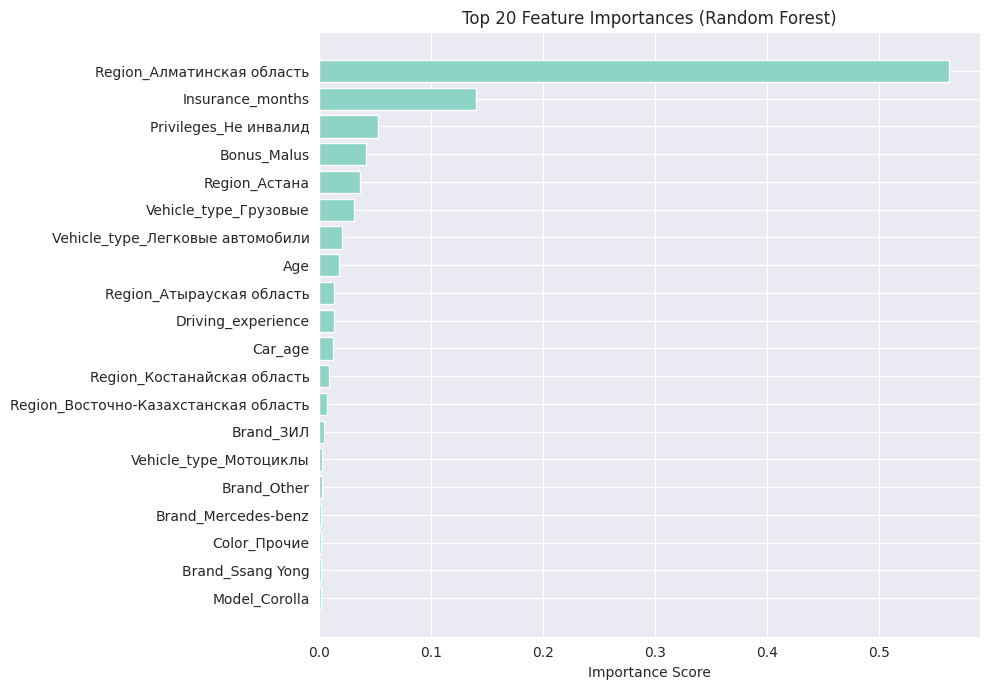

In [ ]:
importances = best_rf_model.feature_importances_
feature_names = X_final_dummies.columns

indices = np.argsort(importances)[-20:][::-1]
top_features = feature_names[indices]
top_importances = importances[indices]

plt.figure(figsize=(10, 7))
plt.barh(top_features, top_importances)
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

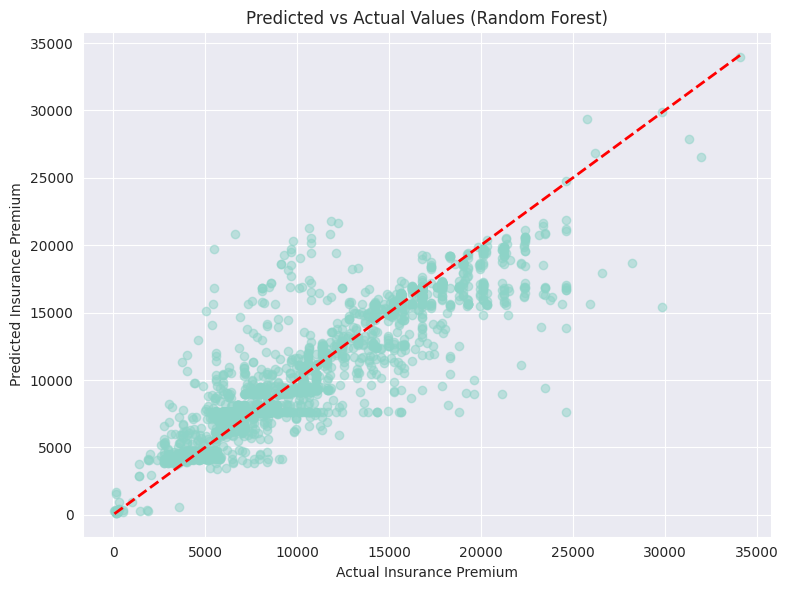

In [ ]:
y_pred = best_rf_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Insurance Premium")
plt.ylabel("Predicted Insurance Premium")
plt.title("Predicted vs Actual Values (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()


---

### Predicted vs Actual Plot Interpretation

#### **Positive Signs:**

* **General upward trend:**
  Most data points align along a diagonal line, indicating that the model **successfully captures the overall relationship** between input features and insurance premiums.

* **Points near the red line:**
  A large number of predictions lie close to the **ideal prediction line**, suggesting the model performs well for many observations.

#### **Areas for Improvement:**

* **Mid-range variance:**
  There is **noticeable spread** in predictions, especially for premiums between **10,000 and 20,000**, indicating room for better precision in that range.

* **Underestimation of high premiums:**
  The model tends to **underpredict actual premiums** when the true values exceed **20,000**, meaning it may struggle with higher-end or outlier cases.

---


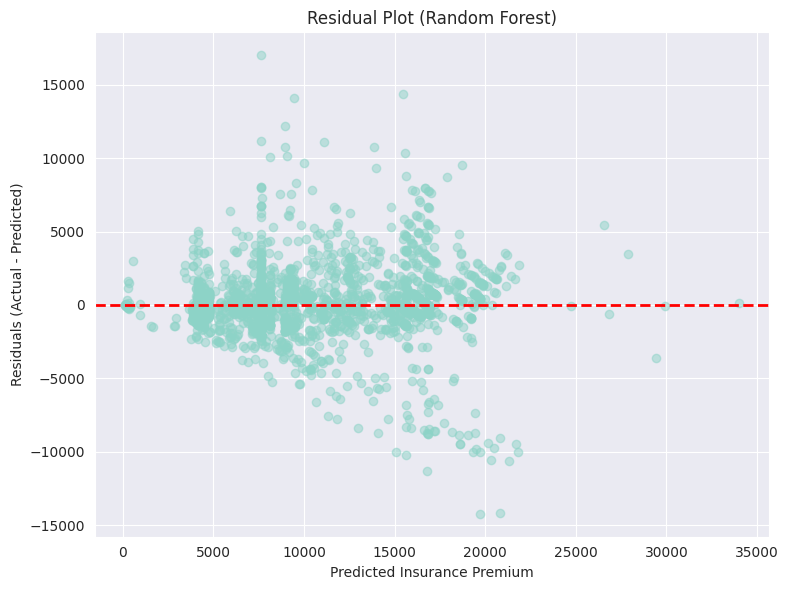

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Insurance Premium")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()


---

### Residual Plot Interpretation

#### **Positive Signs:**

* **Centered around zero:**
  Many residuals are tightly clustered around the red line — especially for predicted premiums in the **0–10,000** range.
  This indicates that the model makes **small and consistent errors** in this region.

* **Symmetry:**
  The distribution of residuals shows a relatively **even balance of positive and negative values**, suggesting the model does **not suffer from severe global bias** (i.e., it's not consistently under- or overestimating).

#### **Model Weakness: Heteroscedasticity**

* **Increasing spread with higher predictions:**
  As predicted premium values increase, **residuals fan out**, indicating that the model’s **variance increases** — it becomes **less stable and less reliable** at higher price ranges.

* **Downward slope of residuals:**
  There’s a visible trend of **negative residuals increasing with predicted value**, which means the model **underpredicts high insurance premiums** more frequently.

---


# RMSE boxplot

<ipython-input-165-a86562ea2632>:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(rmse_scores, vert=True, patch_artist=True, labels=["RMSE"])


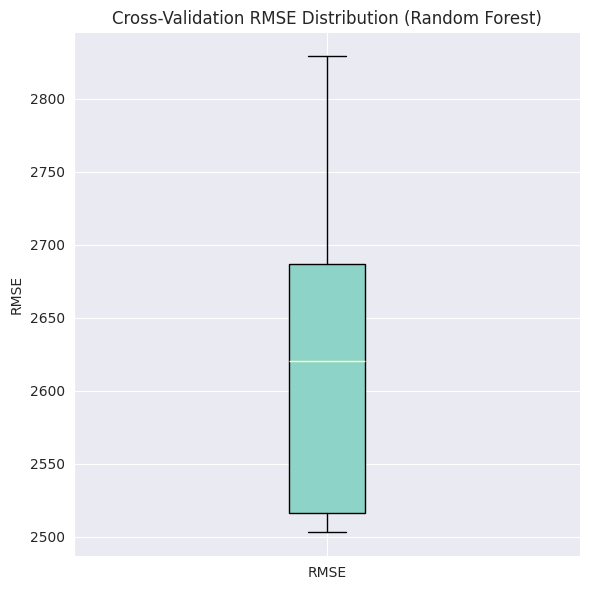

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = np.sqrt(-cross_val_score(
    best_rf_model, X_final_dummies, y,
    cv=kf, scoring='neg_mean_squared_error', n_jobs=-1
))

plt.figure(figsize=(6, 6))
plt.boxplot(rmse_scores, vert=True, patch_artist=True, labels=["RMSE"])
plt.title("Cross-Validation RMSE Distribution (Random Forest)")
plt.ylabel("RMSE")
plt.grid(True)
plt.tight_layout()
plt.show()


---

### RMSE Consistency Across Folds

* **Tight RMSE range (≈ 2500–2800):**
  The Root Mean Squared Error values across different cross-validation folds are closely clustered.

* **Interpretation:**
  This suggests that the model exhibits **low variance in performance**, meaning it is **consistently accurate** across different subsets of the data.

---


# Learning Curve

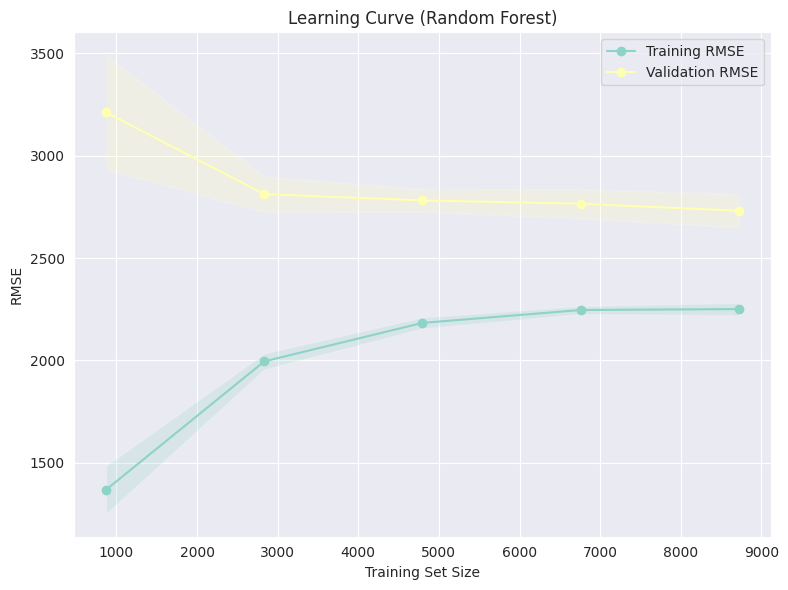

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model,
    X_final_dummies,
    y,
    cv=5,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

train_rmse = np.sqrt(-train_scores)
test_rmse = np.sqrt(-test_scores)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_rmse.mean(axis=1), label='Training RMSE', marker='o')
plt.plot(train_sizes, test_rmse.mean(axis=1), label='Validation RMSE', marker='o')
plt.fill_between(train_sizes,
                 train_rmse.mean(axis=1) - train_rmse.std(axis=1),
                 train_rmse.mean(axis=1) + train_rmse.std(axis=1),
                 alpha=0.2)
plt.fill_between(train_sizes,
                 test_rmse.mean(axis=1) - test_rmse.std(axis=1),
                 test_rmse.mean(axis=1) + test_rmse.std(axis=1),
                 alpha=0.2)

plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




---

### Learning Curve Interpretation

* **What this plot shows:**
  It illustrates how the **model's error (RMSE)** evolves as the **training set size increases**.


#### **Training RMSE Behavior:**

* **Decreases initially, then plateaus:**
  The model **learns quickly** from small datasets, but the improvement **slows down** as more data is added — a typical pattern of diminishing returns.


#### **Validation RMSE Behavior:**

* **Higher than training RMSE:**
  A noticeable gap between training and validation error indicates the model may be **slightly overfitting**.

* **Gap is stable, not increasing:**
  The fact that the gap does **not widen** as more data is added is a **positive sign** — additional training data continues to benefit the model, and overfitting is **not severe**.

---


##  **Conclusion**

This project focused on predicting and analyzing **insurance premiums in Kazakhstan** using a cleaned dataset enriched with detailed **driver, vehicle, and policy information**. Through thorough data preprocessing, visualization, and modeling, several meaningful insights were uncovered.


### Key Findings:

* The distribution of insurance premiums is **bimodal**.
  This pattern is **not** driven by differences in vehicle types, but rather by **subgroups within passenger cars ('Легковые автомобили')** — such as:

  * Experienced vs. new drivers
  * Short- vs. long-term policies
  * Low- vs. high-risk driver profiles

### Insights from Exploratory Data Analysis:

* **Experienced drivers** tend to receive **lower premiums** on average.
* **Longer policy durations** (especially 6- and 12-month contracts) are associated with **higher premiums and wider variability**.
* **High-risk drivers** (with low Bonus-Malus scores) typically pay more,
  but there is a **significant overlap** in premium ranges between risk groups, suggesting that **risk score alone is not sufficient** for pricing prediction.


### Model Performance (Random Forest Regressor):

The **Random Forest Regression** model demonstrated the following predictive capabilities:

* **Low variance** across cross-validation folds — indicating stable generalization.
* **Good trend capture** — the model reflects the overall shape of the target distribution.
* **Mild underprediction** of high premiums — likely due to data imbalance or limited representation of luxury/high-value cases.

---
